Generacion datos sinteticos estaticos del archivo "basic" con TVAE, CTGAN y GaussianCpula

In [12]:
#Importar librerias
import pandas as pd
import time
from sdv.metadata import Metadata
from sdv.metadata import SingleTableMetadata
from sdv.single_table import TVAESynthesizer, CTGANSynthesizer, GaussianCopulaSynthesizer

In [13]:
# Cargar los datos reales
df = pd.read_csv("final_static_data_basic.csv")

In [14]:
#Seleccionar las columnas y guardar en un dataframe
columnas_estaticas=["MMSI", "draught", "to_bow", "to_stern", "to_port", "to_starboard", "shiptype"]  
df_estaticos=df[columnas_estaticas]  

In [15]:
# Obtener los tipos de barco únicos
ship_types = df_estaticos["shiptype"].unique()

In [16]:
# Diccionario para almacenar los datos generados
synthetic_data_all = {"TVAE": [], "GaussianCopula": [], "CTGAN": []}
computation_times = {"TVAE": {}, "GaussianCopula": {}, "CTGAN": {}}


In [17]:
# Obtener las proporciones reales de cada tipo de barco
shiptype_counts = df_estaticos["shiptype"].value_counts(normalize=True)


In [18]:
# Número total de datos sintéticos a generar
num_total_synthetic = 50000

In [19]:
#Calculo delas proporciones de cada tipo
for shiptype, proportion in shiptype_counts.items():
    num_samples = int(num_total_synthetic * proportion)  # Ajustar según la proporción real (multiplicando la proporción por el total de datos sintéticos)
    print(f"\n Generando {num_samples} datos para tipo de barco: {shiptype} ({proportion:.2%} del total)")
    
    # Filtrar los datos del tipo de barco actual
    df_ship = df_estaticos[df_estaticos["shiptype"] == shiptype]
    
   # Definir metadatos del dataset
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df_ship)
    
    # Crear sintetizadores
    synthesizers = {
        "TVAE": TVAESynthesizer(metadata),
        "GaussianCopula": GaussianCopulaSynthesizer(metadata),
        "CTGAN": CTGANSynthesizer(metadata)
    }
    #Entrenamiento de cada modelo y medicion del tiempo de computación
    for method, synthesizer in synthesizers.items():
        print(f"Entrenando {method} para {shiptype}...")
        start_time = time.time()
        synthesizer.fit(df_ship)
        end_time = time.time()
        computation_times[method][shiptype] = end_time - start_time  # Guardar tiempo por barco
        
        # Generar datos sintéticos según la proporción original
        synthetic_data_ship = synthesizer.sample(num_rows=num_samples)
        synthetic_data_ship["shiptype"] = shiptype  # Restaurar la categoría
        synthetic_data_all[method].append(synthetic_data_ship)


 Generando 24353 datos para tipo de barco: ShipType.Cargo (48.71% del total)
Entrenando TVAE para ShipType.Cargo...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Cargo...
Entrenando CTGAN para ShipType.Cargo...

 Generando 9903 datos para tipo de barco: ShipType.Tanker (19.81% del total)
Entrenando TVAE para ShipType.Tanker...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Tanker...
Entrenando CTGAN para ShipType.Tanker...

 Generando 6415 datos para tipo de barco: ShipType.Tug (12.83% del total)
Entrenando TVAE para ShipType.Tug...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Tug...
Entrenando CTGAN para ShipType.Tug...

 Generando 6117 datos para tipo de barco: ShipType.Fishing (12.24% del total)
Entrenando TVAE para ShipType.Fishing...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Fishing...
Entrenando CTGAN para ShipType.Fishing...

 Generando 3209 datos para tipo de barco: ShipType.Passenger (6.42% del total)
Entrenando TVAE para ShipType.Passenger...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Passenger...
Entrenando CTGAN para ShipType.Passenger...


In [23]:
# Crear un diccionario para almacenar cada metadata
metadata_all = {
    'TVAE': Metadata.detect_from_dataframe(data=df_estaticos, table_name='AIS_estaticos_TVAE'),
    'GaussianCopula': Metadata.detect_from_dataframe(data=df_estaticos, table_name='AIS_estaticos_Gaussian'),
    'CTGAN': Metadata.detect_from_dataframe(data=df_estaticos, table_name='AIS_estaticos_CTGAN')
}
# Guardar la metadata a un archivo JSON
for method, data in synthetic_data_all.items():
    metadata_all[method].save_to_json(f"metadata_basic_shiptype_{method}.json")
    print(f"Metadatos de {method} guardados en 'metadata_basic_shiptype_{method}.json'.")

Metadatos de TVAE guardados en 'metadata_basic_shiptype_TVAE.json'.
Metadatos de GaussianCopula guardados en 'metadata_basic_shiptype_GaussianCopula.json'.
Metadatos de CTGAN guardados en 'metadata_basic_shiptype_CTGAN.json'.


In [24]:
# Guardar los datos generados en CSVs
for method, data in synthetic_data_all.items():
    synthetic_static_basic= pd.concat(data, ignore_index=True)
    synthetic_static_basic = synthetic_static_basic.sample(frac=1, random_state=42).reset_index(drop=True)  # Mezclar los datos
    synthetic_static_basic.to_csv(f"synthetic_static_basic_{method}.csv", index=False)
    print(f" Datos sintéticos generados con {method} guardados en 'synthetic_static_basic_{method}.csv'.")

 Datos sintéticos generados con TVAE guardados en 'synthetic_static_basic_TVAE.csv'.
 Datos sintéticos generados con GaussianCopula guardados en 'synthetic_static_basic_GaussianCopula.csv'.
 Datos sintéticos generados con CTGAN guardados en 'synthetic_static_basic_CTGAN.csv'.


In [36]:
for method in ["TVAE", "GaussianCopula", "CTGAN"]:
    # Cargar el CSV generado
    df_synthetic = pd.read_csv(f"synthetic_static_basic_{method}.csv")
    
    # Mostrar 5 filas 
    print(f"Primeras 5 filas de {method}:")
    print(df_synthetic.head(n=5))  # Muestra aleatoria
    
    print("\n" + "-"*50 + "\n")  # Separador entre salidas

Primeras 5 filas de TVAE:
       MMSI    draught      to_bow   to_stern    to_port  to_starboard  \
0  14374624   9.819297  146.485939  34.891283  20.392690     10.544324   
1  15466187   5.290521   31.112901  59.467735   8.766642     12.818422   
2  14981267   9.243166  196.997671  31.122374  21.136936     11.278718   
3   8090997  12.842989  203.632909  27.649310  12.005997     22.157070   
4   5591053   4.181110   29.111132  28.783013   6.013622      2.019162   

           shiptype  
0   ShipType.Tanker  
1    ShipType.Cargo  
2    ShipType.Cargo  
3    ShipType.Cargo  
4  ShipType.Fishing  

--------------------------------------------------

Primeras 5 filas de GaussianCopula:
       MMSI    draught      to_bow   to_stern    to_port  to_starboard  \
0  14374624  13.098885  279.648748  49.782706  35.394045     25.544530   
1  15466187  14.497094  256.266989  40.811324  29.478509     17.362116   
2  14981267   8.713863  135.246131  59.484439  13.153698     11.664804   
3   8090997 

In [27]:
# Convertir los tiempos en un DataFrame para análisis posterior
data_plot = []
for method, times in computation_times.items():
    for shiptype, time_taken in times.items():
        data_plot.append({"Método": method, "Tipo de Barco": shiptype, "Tiempo (s)": time_taken})

df_times = pd.DataFrame(data_plot)

In [28]:
# Guardar los tiempos en un CSV
df_times.to_csv("computation_times_basic.csv", index=False)
print("✅ Tiempos de computación guardados en 'computation_times.csv'")


✅ Tiempos de computación guardados en 'computation_times.csv'


In [38]:
# Mostrar tiempos de computación
print("\n Tiempos de computación por método y tipo de barco (basic):")
for method, times in computation_times.items():
    for shiptype, time_taken in times.items():
        print(f"{method} - {shiptype}: {time_taken:.2f} segundos")


 Tiempos de computación por método y tipo de barco (basic):
TVAE - ShipType.Cargo: 95.00 segundos
TVAE - ShipType.Tanker: 30.40 segundos
TVAE - ShipType.Tug: 19.67 segundos
TVAE - ShipType.Fishing: 18.59 segundos
TVAE - ShipType.Passenger: 11.53 segundos
GaussianCopula - ShipType.Cargo: 1.42 segundos
GaussianCopula - ShipType.Tanker: 0.62 segundos
GaussianCopula - ShipType.Tug: 0.51 segundos
GaussianCopula - ShipType.Fishing: 0.53 segundos
GaussianCopula - ShipType.Passenger: 0.43 segundos
CTGAN - ShipType.Cargo: 160.86 segundos
CTGAN - ShipType.Tanker: 61.41 segundos
CTGAN - ShipType.Tug: 38.68 segundos
CTGAN - ShipType.Fishing: 40.30 segundos
CTGAN - ShipType.Passenger: 18.80 segundos


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Cargar el archivo CSV que contiene los tiempos de computación
archivo_csv = "computation_times_basic.csv"  
df_times_plot = pd.read_csv(archivo_csv)

In [45]:
# Verificar los primeros registros para asegurarse de que se cargó correctamente
print(df_times_plot.head())

  Método       Tipo de Barco  Tiempo (s)
0   TVAE      ShipType.Cargo   94.996473
1   TVAE     ShipType.Tanker   30.397849
2   TVAE        ShipType.Tug   19.668077
3   TVAE    ShipType.Fishing   18.592300
4   TVAE  ShipType.Passenger   11.532845


In [46]:
# Obtener los métodos únicos en el DataFrame
metodos_unicos = df_times_plot['Método'].unique()


/tmp/ipykernel_127163/2124226152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],


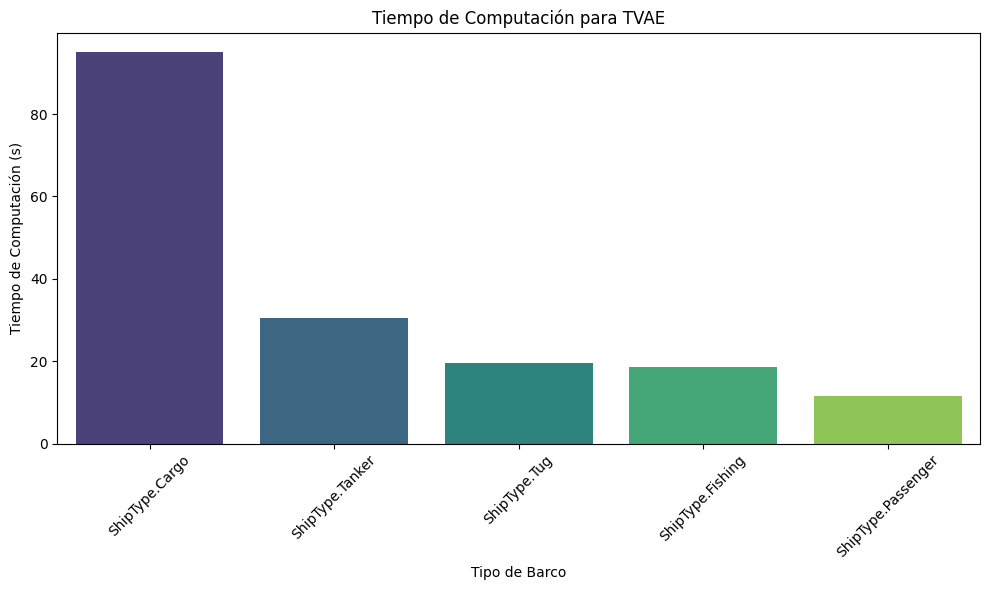

/tmp/ipykernel_127163/2124226152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],


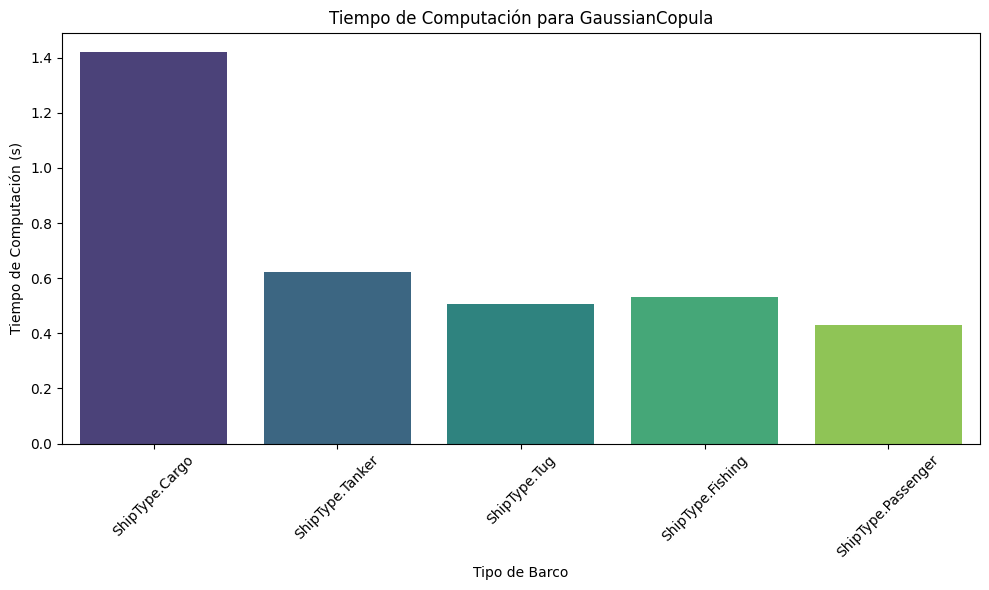

/tmp/ipykernel_127163/2124226152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],


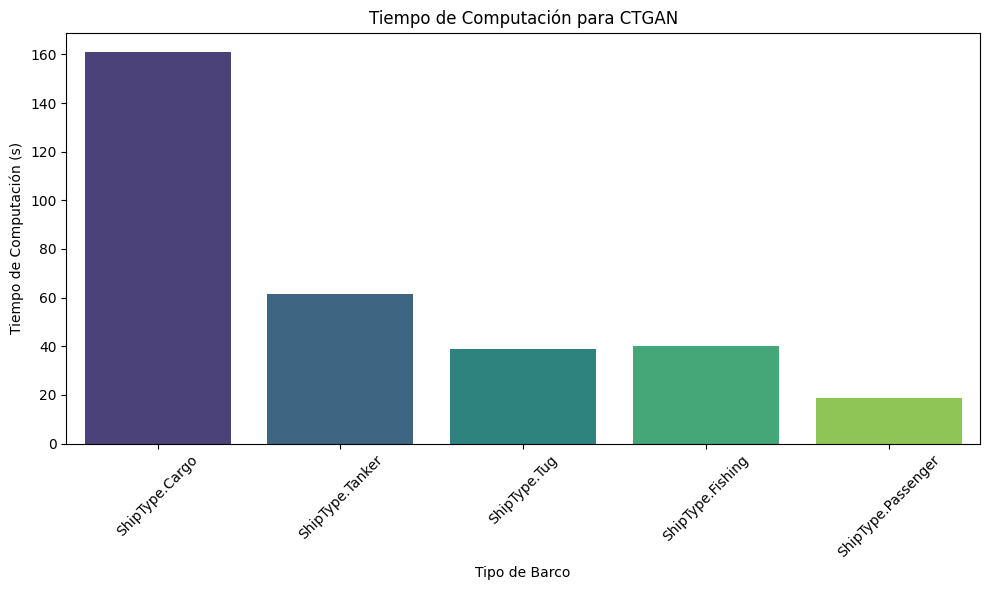

In [47]:
# Crear gráficos para cada método
for metodo in metodos_unicos:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],
                x='Tipo de Barco',
                y='Tiempo (s)',
                palette='viridis')

    plt.title(f'Tiempo de Computación para {metodo}')
    plt.xlabel('Tipo de Barco')
    plt.ylabel('Tiempo de Computación (s)')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ajustar el layout
    plt.show()

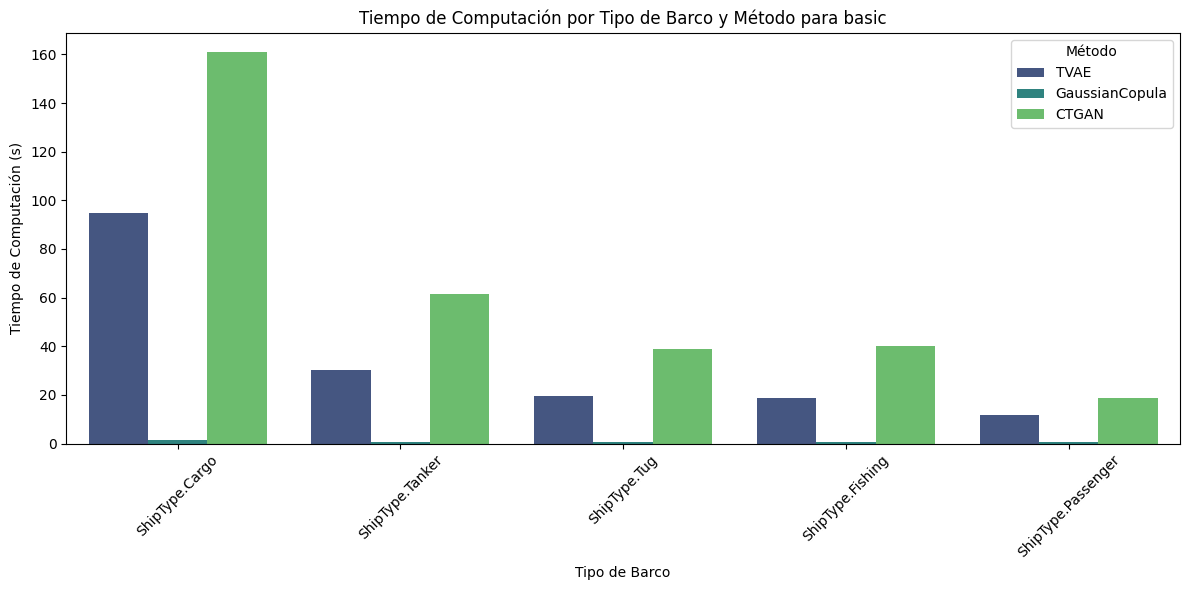

In [49]:
# Crear gráfico de barras en conjunto para comparar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_times_plot, x='Tipo de Barco', y='Tiempo (s)', hue='Método', palette='viridis')

# Personalización del gráfico
plt.title("Tiempo de Computación por Tipo de Barco y Método para basic")
plt.xlabel('Tipo de Barco')
plt.ylabel('Tiempo de Computación (s)')
plt.legend(title='Método')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el layout para que no se solapen los textos

# Mostrar el gráfico
plt.show()